# **Session 6: Probability and Statistics for AI & Machine Learning**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia



## Synthetic Training Data Preparation

In [0]:
import numpy as np
import matplotlib.pyplot as plt


mu_dog, sigma_dog = 50, 15 # mean and standard deviation
dog_data=np.random.normal(mu_dog, sigma_dog, 2000)





mu_cat, sigma_cat = 9, 3 # mean and standard deviation
cat_data=np.random.normal(mu_cat, sigma_cat,2000)


## Synthetic Test Data Preparation

In [7]:
test_data_x=np.zeros(200)
test_data_y=np.zeros(200)



test_data_dog=np.random.normal(mu_dog, sigma_dog, 100)
output_dog=np.zeros(100)


test_data_cat=np.random.normal(mu_cat, sigma_cat,100)
output_cat=np.ones(100)

test_data_x=np.append(test_data_dog,test_data_cat)
test_data_y=np.append(output_dog,output_cat)

print(test_data_x)
print(test_data_y)

[57.95574619 60.35513618 68.81463966 56.03276725 46.14008007 29.50613032
 48.91340212 49.07572164 31.35749457 50.8984899  19.47818863 43.30871305
 28.56619108 20.6213932  38.4707074  42.42453394 78.17306773 54.23048547
 49.70790289 46.60370749 61.08799002 58.63811556 64.90634618 45.8716161
 33.44052818 81.52084375 89.72176395 46.83579692 24.30147597 27.84063731
 41.6820329  49.81502637 36.58203695 49.10411017 76.99006707 40.86541062
 35.95183229 43.13902156 42.29441014 45.62155529 53.98784533 59.49785989
 44.53600979 43.87644222 54.45620485 64.24504847 52.46824133 34.20450679
 74.76580183 49.31186235 45.10548778 26.01916779 68.39978175 39.78763894
 62.42907274 57.22677628 61.079151   33.95197311 38.0265932  62.97141602
 31.4471092  79.7113279  62.37456558 76.01861292 56.18759246 37.90991874
 48.46478975 44.69759405 44.24239882 35.36790579 42.50476619 52.61605405
 57.49561587 68.73085359 31.59072359 43.1032609  27.67094613 30.64915792
 39.43242628 62.13858168 46.9513725  62.49247174 41.

## Estimating P(W|Dog) and P(W|Cat) from training data

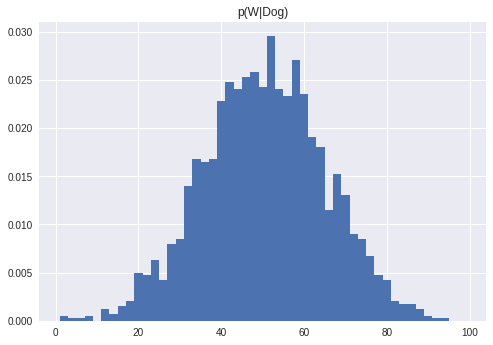

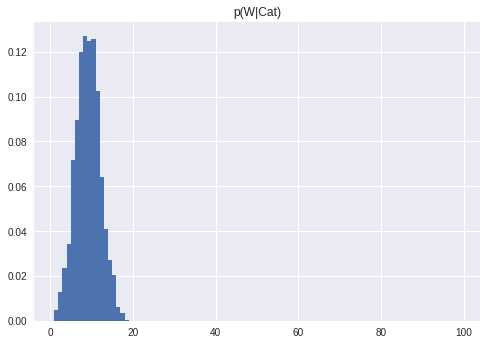

In [10]:
plt.hist(dog_data, bins=np.arange(1,100,2),density=True)
hist_dog, bin_edges_dog = np.histogram(dog_data, bins=np.arange(1,100,1),density=True)
plt.title("p(W|Dog)")
plt.show()


plt.hist(cat_data, bins=np.arange(1,100,1),density=True)
hist_cat, bin_edges_cat = np.histogram(cat_data, bins=np.arange(1,100,1),density=True)

plt.title("p(W|Cat)")

plt.show()

## Posterior Calculation
**Let's assume the priors are as following**:
P(Cat)=0.75
P(Dog)=0.25

We are in a neighborhood with many feral cats, but with fewer dogs.

P(Cat|W)=P(W|Cat)P(Cat)/P(W)

P(Dog|W)=P(W|Dog)P(Dog)/P(W)


P(W)=P(W|Cat)P(Cat)+P(W|Dog)P(Dog)

Programing hint: 

P(W|Cat)=hist_cat(math.ceil(W)]

P(W|Dog)=Dog_likelihood=hist_dog[(np.int16(np.ceil(cat_data_test)))]

## The denominators are the same for both P(Cat|W) and P(Dog|W). And we are only interested in which Posterior is greater, P(Cat|W) or P(Dog|W). So for simplicty we are dropping the denominators. We are still callign the right hand sides Posteriors, P(Cat|W) and P(Dog|W). But technically speaking they are not.



In [5]:
y_hat=np.zeros(200)
Cat_prior=0.75
Dog_prior=0.25
Dog_likelihood=hist_dog[(np.int16(np.ceil(test_data_x)))]
Cat_likelihood=hist_cat[(np.int16(np.ceil(test_data_x)))]

Cat_posterior=Cat_likelihood*Cat_prior
Dog_posterior=Dog_likelihood*Dog_prior

for i in range(0,200):
  if Cat_posterior[i]>Dog_posterior[i]:
    y_hat[i]=1
  else:
    y_hat[i]=0
    
    
print(y_hat)
    
  
  
print(sum(1 for i, j in zip(test_data_y, y_hat) if i != j))


    
    





[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1.]
7
